<a href="https://colab.research.google.com/github/GomathyDhanya/Learning_DL/blob/master/imdbdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras 
from tensorflow.keras import layers

In [ ]:


(train_data,train_targets),(test_data,test_targets)=imdb.load_data(num_words=10000)

print(train_data[0])
print(train_targets[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
dictionary =imdb.get_word_index()

In [ ]:
rev_dict=dict(zip(dictionary.values(),dictionary.keys()))

In [ ]:
for word_num in train_data[1]:
  print(rev_dict.get(word_num-3,""),end=" ")

  #lololololol

 big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal  the hair is big lots of boobs  men wear those cut  shirts that show off their  sickening that men actually wore them and the music is just  trash that plays over and over again in almost every scene there is trashy music boobs and  taking away bodies and the gym still doesn't close for  all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then 

In [ ]:
print(len(train_data))

25000


In [ ]:
def one_hot_keying(dataset,size=10000):
  train_data_list=np.zeros((len(dataset),size))
  for i in range(len(dataset)):
    for j in dataset[i]:
      train_data_list[i][j]=1
  return train_data_list

In [ ]:
train_x=one_hot_keying(train_data)
test_x=one_hot_keying(test_data)

In [ ]:
train_x[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
train_y = np.asarray(train_targets).astype("float32")
test_y = np.asarray(test_targets).astype("float32")

In [ ]:
model=keras.Sequential(
  [
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
  ]
)

In [ ]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
val_x = train_x[:10000]
partial_train_x = train_x[10000:]
val_y = train_y[:10000]
partial_train_y = train_y[10000:]

In [ ]:
history=model.fit(partial_train_x,partial_train_y,512,10,validation_data=(val_x,val_y))

Epoch 1/10
30/30 [==============================] - 2s 56ms/step - loss: 0.5624 - accuracy: 0.7496 - val_loss: 0.4174 - val_accuracy: 0.8708
Epoch 2/10
30/30 [==============================] - 1s 35ms/step - loss: 0.3248 - accuracy: 0.8981 - val_loss: 0.3086 - val_accuracy: 0.8857
Epoch 3/10
30/30 [==============================] - 1s 36ms/step - loss: 0.2274 - accuracy: 0.9233 - val_loss: 0.2776 - val_accuracy: 0.8892
Epoch 4/10
30/30 [==============================] - 1s 35ms/step - loss: 0.1735 - accuracy: 0.9429 - val_loss: 0.2923 - val_accuracy: 0.8815
Epoch 5/10
30/30 [==============================] - 1s 35ms/step - loss: 0.1392 - accuracy: 0.9546 - val_loss: 0.2862 - val_accuracy: 0.8876
Epoch 6/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1089 - accuracy: 0.9660 - val_loss: 0.3855 - val_accuracy: 0.8605
Epoch 7/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0863 - accuracy: 0.9737 - val_loss: 0.3397 - val_accuracy: 0.8795
Epoch 8/10
30

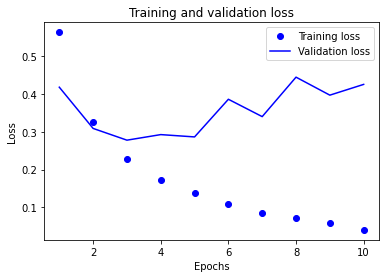

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

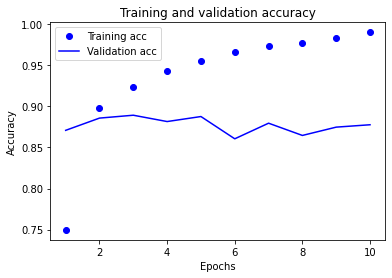

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_x, test_y)

782/782 [==============================] - 2s 2ms/step - loss: 0.4645 - accuracy: 0.8613
